In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('train.csv')
dataset.head()
# NObeyesdad is the categorical target
# Classification

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
dataset.shape

(20758, 18)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
dataset.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
dataset.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

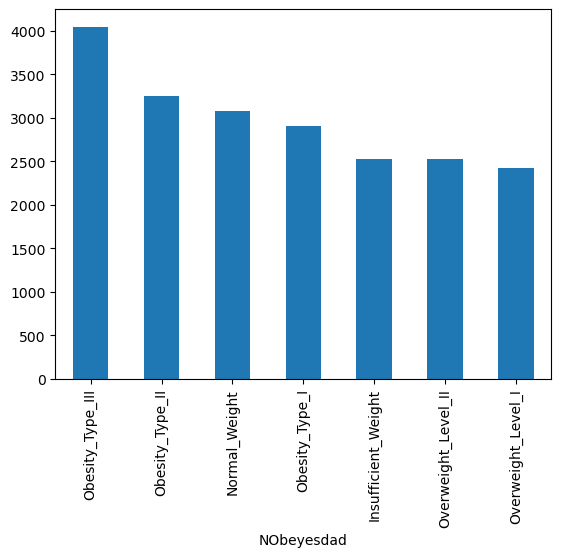

In [8]:
dataset['NObeyesdad'].value_counts().plot(kind='bar')
dataset['NObeyesdad'].value_counts()

In [9]:
# feature selection needs to be used 
# Understand what makes someone obesity_type_iii, obesity_type_ii,etc
# change our object to numercial functions 
# target is not balanced lets change that
# lets use a baseline model to understand what we need to change
# gridsearchcv, cv, pipelines will be needed 
# maybe create new feature called bmi

In [10]:
# Understand what makes someone obesity_type_iii, obesity_type_ii,etc
# obesity_type_iii

What makes someone obesity_type_iii,etc?

In [11]:
obesity_type_iii = dataset[dataset['NObeyesdad']=='Obesity_Type_III']
obesity_type_iii

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.0,3.0,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.0,3.0,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III
13,13,Female,21.412538,1.729045,131.529267,yes,yes,3.0,3.0,Sometimes,no,1.959531,no,1.425712,0.947884,Sometimes,Public_Transportation,Obesity_Type_III
22,22,Female,25.918524,1.663341,112.579220,yes,yes,3.0,3.0,Sometimes,no,2.724099,no,0.000000,0.081156,Sometimes,Public_Transportation,Obesity_Type_III
26,26,Female,26.000000,1.611462,111.950113,yes,yes,3.0,3.0,Sometimes,no,2.609052,no,0.000000,0.079334,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20733,20733,Female,26.000000,1.623303,105.037463,yes,yes,3.0,3.0,Sometimes,no,2.474518,no,0.000000,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20737,20737,Female,25.783865,1.633020,104.988925,yes,yes,3.0,3.0,Sometimes,no,1.322004,no,0.246290,0.723154,Sometimes,Public_Transportation,Obesity_Type_III
20744,20744,Female,26.000000,1.637524,111.946655,yes,yes,3.0,3.0,Sometimes,no,2.396977,no,0.000000,0.037078,Sometimes,Public_Transportation,Obesity_Type_III
20749,20749,Female,25.783865,1.646390,104.835346,yes,yes,3.0,3.0,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
averages = {}
for column in obesity_type_iii.columns:
    if pd.api.types.is_numeric_dtype(obesity_type_iii[column]):
        columns_avg = obesity_type_iii[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_III:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_III:
id: 10507.706870983688
Age: 24.12684706920415
Height: 1.676006735788433
Weight: 117.69745205857639
FCVC: 3.0
NCP: 2.9999496018289666
CH2O: 2.3323376122095896
FAF: 0.5492248648047454
TUE: 0.5488491851211073


In [13]:
object_value_counts = {}
for column in obesity_type_iii.columns:
    if obesity_type_iii[column].dtype == 'object':
        value_counts = obesity_type_iii[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')
    print(counts)
    print()

Value counts for columns with dtype object: 
Gender
Female    4041
Male         5
Name: count, dtype: int64:
Gender
Female    4041
Male         5
Name: count, dtype: int64

family_history_with_overweight
yes    4045
no        1
Name: count, dtype: int64:
family_history_with_overweight
yes    4045
no        1
Name: count, dtype: int64

FAVC
yes    4045
no        1
Name: count, dtype: int64:
FAVC
yes    4045
no        1
Name: count, dtype: int64

CAEC
Sometimes     4042
Frequently       3
Always           1
Name: count, dtype: int64:
CAEC
Sometimes     4042
Frequently       3
Always           1
Name: count, dtype: int64

SMOKE
no     4042
yes       4
Name: count, dtype: int64:
SMOKE
no     4042
yes       4
Name: count, dtype: int64

SCC
no    4046
Name: count, dtype: int64:
SCC
no    4046
Name: count, dtype: int64

CALC
Sometimes    4046
Name: count, dtype: int64:
CALC
Sometimes    4046
Name: count, dtype: int64

MTRANS
Public_Transportation    4046
Name: count, dtype: int64:
MTRANS
Publ

### Profile for Obesity_Type_III

- Gender: Female
- Age: 24
- Height: 1.68
- Weight: 118
- Family_history_With_overweight: Yes
- FAVC: Yes
- FCVC: 3.0
- NCP: 3.0
- CAEC: Sometimes
- Smoke: No
- CH20: 2.33
- SCC: No
- FAF: 0.55
- TUE: 0.55
- CALC: Sometimes
- MTrans: Public Transportation

In [14]:
obesity_type_ii = dataset[dataset['NObeyesdad']=='Obesity_Type_II']
obesity_type_ii

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
15,15,Male,28.377958,1.706525,102.592171,yes,yes,2.636719,3.000000,Sometimes,no,1.000000,no,1.995582,0.930836,Sometimes,Public_Transportation,Obesity_Type_II
19,19,Male,25.492855,1.771817,114.470482,yes,yes,1.392665,3.000000,Sometimes,no,1.238057,no,1.097905,0.619012,Sometimes,Public_Transportation,Obesity_Type_II
30,30,Male,23.118327,1.851123,119.841446,yes,yes,2.203962,2.954446,Sometimes,no,2.854161,no,1.191020,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20734,20734,Male,24.417552,1.763582,117.384745,yes,yes,2.973569,2.993634,Sometimes,no,2.028368,no,1.390160,0.449886,Sometimes,Public_Transportation,Obesity_Type_II
20739,20739,Male,40.501722,1.619128,109.980145,yes,yes,2.731368,2.657720,Sometimes,no,1.000463,no,1.144876,0.474836,Sometimes,Public_Transportation,Obesity_Type_II
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [15]:
averages = {}
for column in obesity_type_ii.columns:
    if pd.api.types.is_numeric_dtype(obesity_type_ii[column]):
        columns_avg = obesity_type_ii[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_III:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_III:
id: 10614.992302955665
Age: 27.70712786668719
Height: 1.7827151474753695
Weight: 115.99591406003694
FCVC: 2.425226797721675
NCP: 2.7984388054187197
CH2O: 1.9850644633620689
FAF: 1.0295790954433497
TUE: 0.4156009758312808


In [16]:
object_value_counts = {}
for column in obesity_type_ii.columns:
    if obesity_type_ii[column].dtype == 'object':
        value_counts = obesity_type_ii[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')
    print(counts)
    print()

Value counts for columns with dtype object: 
Gender
Male      3240
Female       8
Name: count, dtype: int64:
Gender
Male      3240
Female       8
Name: count, dtype: int64

family_history_with_overweight
yes    3243
no        5
Name: count, dtype: int64:
family_history_with_overweight
yes    3243
no        5
Name: count, dtype: int64

FAVC
yes    3194
no       54
Name: count, dtype: int64:
FAVC
yes    3194
no       54
Name: count, dtype: int64

CAEC
Sometimes     3224
Frequently      12
Always          10
no               2
Name: count, dtype: int64:
CAEC
Sometimes     3224
Frequently      12
Always          10
no               2
Name: count, dtype: int64

SMOKE
no     3134
yes     114
Name: count, dtype: int64:
SMOKE
no     3134
yes     114
Name: count, dtype: int64

SCC
no     3244
yes       4
Name: count, dtype: int64:
SCC
no     3244
yes       4
Name: count, dtype: int64

CALC
Sometimes     2777
no             458
Frequently      13
Name: count, dtype: int64:
CALC
Sometimes     277

### Profile for Obesity_Type_II

- Gender: Male
- Age: 27
- Height: 1.78
- Weight: 116
- Family_history_With_overweight: Yes
- FAVC: Yes
- FCVC: 2.43
- NCP: 2.80
- CAEC: Sometimes
- Smoke: No
- CH20: 1.99
- SCC: No
- FAF: 1.02
- TUE: 0.41
- CALC: Sometimes
- MTrans: Public Transportation

In [17]:
normal_weight = dataset[dataset['NObeyesdad']=='Normal_Weight']
normal_weight

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,1,Female,18.0,1.56,57.0,yes,yes,2.0,3.0,Frequently,no,2.0,no,1.0,1.0,no,Automobile,Normal_Weight
11,11,Male,22.0,1.70,70.0,yes,no,2.0,3.0,no,no,2.0,no,2.0,1.0,no,Walking,Normal_Weight
14,14,Female,20.0,1.57,49.0,no,no,2.0,1.0,Sometimes,no,1.0,no,3.0,2.0,no,Walking,Normal_Weight
17,17,Female,18.0,1.56,50.0,no,yes,3.0,3.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Normal_Weight
21,21,Female,19.0,1.65,64.0,yes,yes,2.0,3.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20700,20700,Female,18.0,1.61,65.0,yes,yes,2.0,3.0,Frequently,no,3.0,no,3.0,2.0,no,Public_Transportation,Normal_Weight
20703,20703,Female,19.0,1.60,45.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
20722,20722,Female,18.0,1.65,56.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
20740,20740,Female,20.0,1.59,49.0,no,no,2.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [18]:
averages = {}
for column in normal_weight.columns:
    if pd.api.types.is_numeric_dtype(normal_weight[column]):
        columns_avg = normal_weight[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_III:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_III:
id: 10136.834523036989
Age: 20.801387907852043
Height: 1.6707440107073328
Weight: 61.53328924464634
FCVC: 2.372248959441921
NCP: 2.8895516593121346
CH2O: 1.8062043118105127
FAF: 1.1895797316677483
TUE: 0.630215727449708


In [19]:
object_value_counts = {}
for column in normal_weight.columns:
    if normal_weight[column].dtype == 'object':
        value_counts = normal_weight[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')
    print(counts)
    print()

Value counts for columns with dtype object: 
Gender
Female    1660
Male      1422
Name: count, dtype: int64:
Gender
Female    1660
Male      1422
Name: count, dtype: int64

family_history_with_overweight
yes    1790
no     1292
Name: count, dtype: int64:
family_history_with_overweight
yes    1790
no     1292
Name: count, dtype: int64

FAVC
yes    2587
no      495
Name: count, dtype: int64:
FAVC
yes    2587
no      495
Name: count, dtype: int64

CAEC
Sometimes     2065
Frequently     706
Always         275
no              36
Name: count, dtype: int64:
CAEC
Sometimes     2065
Frequently     706
Always         275
no              36
Name: count, dtype: int64

SMOKE
no     3036
yes      46
Name: count, dtype: int64:
SMOKE
no     3036
yes      46
Name: count, dtype: int64

SCC
no     2922
yes     160
Name: count, dtype: int64:
SCC
no     2922
yes     160
Name: count, dtype: int64

CALC
Sometimes     1940
no            1074
Frequently      68
Name: count, dtype: int64:
CALC
Sometimes     194

### Profile for Normal Weight

- Gender: Female and Male
- Age: 21
- Height: 1.67
- Weight: 61.54
- Family_history_With_overweight: Yes and No
- FAVC: Yes
- FCVC: 2.37
- NCP: 2.89
- CAEC: Sometimes
- Smoke: No
- CH20: 1.80
- SCC: No
- FAF: 1.19
- TUE: 0.63
- CALC: Sometimes
- MTrans: Public Transportation

In [20]:
obesity_type_i = dataset[dataset['NObeyesdad']=='Obesity_Type_I']
obesity_type_i

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
12,12,Male,18.000000,1.811189,108.251044,yes,yes,2.000000,2.164839,Sometimes,no,2.530157,no,1.000000,0.553311,no,Public_Transportation,Obesity_Type_I
23,23,Female,29.740496,1.502609,77.929204,yes,yes,2.000000,1.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
25,25,Male,41.318302,1.853223,96.078462,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,2.000000,0.000000,Frequently,Automobile,Obesity_Type_I
31,31,Male,23.000000,1.700000,97.000000,yes,no,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,0.000000,no,Public_Transportation,Obesity_Type_I
41,41,Male,21.000000,1.790000,105.000000,yes,yes,2.000000,1.703299,Sometimes,no,3.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20704,20704,Male,17.894784,1.722884,97.971598,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,2.000000,no,Public_Transportation,Obesity_Type_I
20720,20720,Male,18.000000,1.717432,108.897324,yes,yes,2.000000,1.255350,Sometimes,no,2.000000,no,0.000000,1.967259,Sometimes,Public_Transportation,Obesity_Type_I
20729,20729,Male,21.834894,1.722785,98.447311,yes,yes,2.000000,2.714115,Sometimes,no,2.374044,no,2.834373,2.000000,no,Public_Transportation,Obesity_Type_I
20741,20741,Male,22.277859,1.791174,105.037203,yes,yes,2.997951,3.000000,Sometimes,no,2.034150,no,2.000000,0.508663,Sometimes,Public_Transportation,Obesity_Type_I


In [21]:
averages = {}
for column in obesity_type_i.columns:
    if pd.api.types.is_numeric_dtype(obesity_type_i[column]):
        columns_avg = obesity_type_i[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_I:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_I:
id: 10170.039518900343
Age: 25.023615364261165
Height: 1.693508940549828
Weight: 92.37102559725086
FCVC: 2.0970522731958763
NCP: 2.4545514934707904
CH2O: 2.129782564604811
FAF: 0.9227103509484534
TUE: 0.7394766257731958


In [22]:
object_value_counts = {}
for column in obesity_type_i.columns:
    if obesity_type_i[column].dtype == 'object':
        value_counts = obesity_type_i[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')
    print(counts)
    print()

Value counts for columns with dtype object: 
Gender
Male      1643
Female    1267
Name: count, dtype: int64:
Gender
Male      1643
Female    1267
Name: count, dtype: int64

family_history_with_overweight
yes    2862
no       48
Name: count, dtype: int64:
family_history_with_overweight
yes    2862
no       48
Name: count, dtype: int64

FAVC
yes    2817
no       93
Name: count, dtype: int64:
FAVC
yes    2817
no       93
Name: count, dtype: int64

CAEC
Sometimes     2782
Always          64
Frequently      56
no               8
Name: count, dtype: int64:
CAEC
Sometimes     2782
Always          64
Frequently      56
no               8
Name: count, dtype: int64

SMOKE
no     2886
yes      24
Name: count, dtype: int64:
SMOKE
no     2886
yes      24
Name: count, dtype: int64

SCC
no     2892
yes      18
Name: count, dtype: int64:
SCC
no     2892
yes      18
Name: count, dtype: int64

CALC
Sometimes     1444
no            1390
Frequently      76
Name: count, dtype: int64:
CALC
Sometimes     144

### Profile for Obesity_Type_I

- Gender: Female and Male
- Age: 25
- Height: 1.70
- Weight: 92
- Family_history_With_overweight: Yes
- FAVC: Yes
- FCVC: 2.10
- NCP: 2.45
- CAEC: Sometimes
- Smoke: No
- CH20: 2.13
- SCC: No
- FAF: 0.92
- TUE: 0.74
- CALC: Sometimes
- MTrans: Public Transportation

In [23]:
insufficient_weight = dataset[dataset['NObeyesdad']=='Insufficient_Weight']
insufficient_weight

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
24,24,Male,18.000000,1.753321,52.058335,yes,yes,2.000000,3.000000,Sometimes,no,2.072194,no,0.680464,1.258881,no,Public_Transportation,Insufficient_Weight
39,39,Female,22.126325,1.647811,49.603807,yes,yes,2.417635,3.998618,Frequently,no,1.438398,no,2.000000,1.000000,no,Public_Transportation,Insufficient_Weight
52,52,Female,19.799054,1.596110,42.848033,no,yes,3.000000,2.581015,Frequently,no,1.163264,no,0.544784,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20726,20726,Female,21.959940,1.530248,42.000000,no,yes,2.919584,3.371832,Frequently,no,1.796257,no,0.819269,0.089354,Sometimes,Public_Transportation,Insufficient_Weight
20728,20728,Female,17.000000,1.700000,50.000000,no,yes,1.000000,3.000000,Frequently,no,1.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
20742,20742,Female,19.637947,1.718890,51.149283,yes,yes,3.000000,3.000000,Frequently,no,1.221281,no,1.926592,0.805008,no,Public_Transportation,Insufficient_Weight
20745,20745,Female,19.979810,1.742901,49.932199,no,yes,2.969233,3.489918,Frequently,no,2.721769,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [24]:
averages = {}
for column in insufficient_weight.columns:
    if pd.api.types.is_numeric_dtype(insufficient_weight[column]):
        columns_avg = insufficient_weight[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_I:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_I:
id: 10388.80459770115
Age: 19.336502347998415
Height: 1.6836931973840665
Weight: 49.86077322235434
FCVC: 2.4797556801426874
NCP: 2.9195544284581847
CH2O: 1.7441630804597699
FAF: 1.2017821993658344
TUE: 0.8029005521204915


In [25]:
object_value_counts = {}
for column in insufficient_weight.columns:
    if insufficient_weight[column].dtype == 'object':
        value_counts = insufficient_weight[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')

Value counts for columns with dtype object: 
Gender
Female    1621
Male       902
Name: count, dtype: int64:
family_history_with_overweight
no     1449
yes    1074
Name: count, dtype: int64:
FAVC
yes    2153
no      370
Name: count, dtype: int64:
CAEC
Sometimes     1268
Frequently    1212
Always          35
no               8
Name: count, dtype: int64:
SMOKE
no     2516
yes       7
Name: count, dtype: int64:
SCC
no     2291
yes     232
Name: count, dtype: int64:
CALC
Sometimes     1620
no             889
Frequently      14
Name: count, dtype: int64:
MTRANS
Public_Transportation    2166
Automobile                277
Walking                    74
Motorbike                   4
Bike                        2
Name: count, dtype: int64:
NObeyesdad
Insufficient_Weight    2523
Name: count, dtype: int64:


### Profile for Insufficient_Weight

- Gender: Female 
- Age: 29
- Height: 1.68
- Weight: 50
- Family_history_With_overweight: Yes and No
- FAVC: Yes
- FCVC: 2.48
- NCP: 2.92
- CAEC: Sometimes and Frequently
- Smoke: No
- CH20: 1.74
- SCC: No
- FAF: 1.20
- TUE: 0.80
- CALC: Sometimes
- MTrans: Public Transportation

In [26]:
overweight_level_ii = dataset[dataset['NObeyesdad']=='Overweight_Level_II']
overweight_level_ii

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
16,16,Female,34.000000,1.700000,80.000000,yes,no,3.000000,3.000000,Always,no,2.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
18,18,Male,22.000000,1.700000,80.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Overweight_Level_II
20,20,Female,22.000000,1.670000,80.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20732,20732,Female,35.389491,1.642506,79.843221,yes,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.057926,no,Automobile,Overweight_Level_II
20738,20738,Male,23.562135,1.713670,82.130728,yes,yes,2.043359,2.977400,Sometimes,no,1.226764,no,0.994592,0.969097,Sometimes,Public_Transportation,Overweight_Level_II
20747,20747,Male,33.000000,1.720000,99.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Automobile,Overweight_Level_II
20748,20748,Male,21.000000,1.757958,89.048151,yes,yes,1.882235,3.000000,Sometimes,no,2.000000,no,0.988668,1.000000,no,Public_Transportation,Overweight_Level_II


In [27]:
averages = {}
for column in overweight_level_ii.columns:
    if pd.api.types.is_numeric_dtype(overweight_level_ii[column]):
        columns_avg = overweight_level_ii[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_I:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_I:
id: 10494.728390166534
Age: 26.032083734734332
Height: 1.70616292704203
Weight: 82.08551252299762
FCVC: 2.224498800555115
NCP: 2.5941091459159398
CH2O: 2.0044699643140365
FAF: 1.0608949559873115
TUE: 0.6979841038858049


In [28]:
object_value_counts = {}
for column in overweight_level_ii.columns:
    if overweight_level_ii[column].dtype == 'object':
        value_counts = overweight_level_ii[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')

Value counts for columns with dtype object: 
Gender
Male      1767
Female     755
Name: count, dtype: int64:
family_history_with_overweight
yes    2329
no      193
Name: count, dtype: int64:
FAVC
yes    1983
no      539
Name: count, dtype: int64:
CAEC
Sometimes     2273
Frequently     210
Always          33
no               6
Name: count, dtype: int64:
SMOKE
no     2497
yes      25
Name: count, dtype: int64:
SCC
no     2498
yes      24
Name: count, dtype: int64:
CALC
Sometimes     1279
no            1015
Frequently     228
Name: count, dtype: int64:
MTRANS
Public_Transportation    1649
Automobile                782
Walking                    84
Bike                        4
Motorbike                   3
Name: count, dtype: int64:
NObeyesdad
Overweight_Level_II    2522
Name: count, dtype: int64:


### Profile for Overweight_Level_II

- Gender: Male
- Age: 26
- Height: 1.70
- Weight: 82
- Family_history_With_overweight: Yes
- FAVC: Yes
- FCVC: 2.22
- NCP: 2.60
- CAEC: Sometimes 
- Smoke: No
- CH20: 2.00
- SCC: No
- FAF: 1.06
- TUE: 0.70
- CALC: Sometimes and No
- MTrans: Public Transportation

In [29]:
overweight_level_i = dataset[dataset['NObeyesdad']=='Overweight_Level_I']
overweight_level_i

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.00000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
10,10,Female,20.000000,1.650000,65.000000,yes,yes,3.000000,3.000000,Sometimes,no,3.00000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
35,35,Female,18.634286,1.692646,79.697278,no,yes,1.989899,1.893811,Sometimes,no,1.00000,no,1.000000,0.704978,Sometimes,Public_Transportation,Overweight_Level_I
45,45,Female,21.000000,1.550000,68.000000,no,yes,2.000000,3.000000,Frequently,no,2.00000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
51,51,Male,21.000000,1.620000,70.000000,no,no,2.000000,1.000000,no,no,3.00000,no,1.000000,0.000000,no,Public_Transportation,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20730,20730,Male,19.000000,1.800000,85.000000,yes,no,3.000000,3.000000,Sometimes,no,3.00000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
20735,20735,Male,21.000000,1.790000,89.800000,yes,no,2.000000,3.000000,Sometimes,no,2.00000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
20736,20736,Male,21.000000,1.620000,70.000000,yes,yes,3.000000,1.000000,Sometimes,no,3.00000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
20743,20743,Female,19.000000,1.740000,78.000000,yes,yes,3.000000,1.000000,Sometimes,no,2.00000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I


In [30]:
averages = {}
for column in overweight_level_i.columns:
    if pd.api.types.is_numeric_dtype(overweight_level_i[column]):
        columns_avg = overweight_level_i[column].mean()
        averages[column] = columns_avg
        
print("Averages of numercial columns for Obesity_type_I:")
for column,avg in averages.items():
    print(f'{column}: {avg}')

Averages of numercial columns for Obesity_type_I:
id: 10271.952204367532
Age: 23.045196837659663
Height: 1.6868798578491966
Weight: 74.2282658604038
FCVC: 2.2565829472805934
NCP: 2.528178222908941
CH2O: 2.0693658393077876
FAF: 1.134657133498146
TUE: 0.5570144470539761


In [31]:
object_value_counts = {}
for column in overweight_level_i.columns:
    if overweight_level_i[column].dtype == 'object':
        value_counts = overweight_level_i[column].value_counts()
        object_value_counts[column] = value_counts
print("Value counts for columns with dtype object: ")
for column,counts in object_value_counts.items():
    print(f'{counts}:')

Value counts for columns with dtype object: 
Gender
Male      1357
Female    1070
Name: count, dtype: int64:
family_history_with_overweight
yes    1671
no      756
Name: count, dtype: int64:
FAVC
yes    2203
no      224
Name: count, dtype: int64:
CAEC
Sometimes     1875
Frequently     273
no             219
Always          60
Name: count, dtype: int64:
SMOKE
no     2402
yes      25
Name: count, dtype: int64:
SCC
no     2178
yes     249
Name: count, dtype: int64:
CALC
Sometimes     1960
no             337
Frequently     130
Name: count, dtype: int64:
MTRANS
Public_Transportation    1835
Automobile                475
Walking                   101
Bike                        9
Motorbike                   7
Name: count, dtype: int64:
NObeyesdad
Overweight_Level_I    2427
Name: count, dtype: int64:


### Profile for Overweight_Level_I

- Gender: Male and Female
- Age: 23
- Height: 1.68
- Weight: 74
- Family_history_With_overweight: Yes
- FAVC: Yes
- FCVC: 2.25
- NCP: 2.53
- CAEC: Sometimes 
- Smoke: No
- CH20: 2.07
- SCC: No
- FAF: 1.13
- TUE: 0.58
- CALC: Sometimes
- MTrans: Public Transportation

In [32]:
# target is not balanced lets change that
# lets make it balance

In [33]:
dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset1 = dataset
dataset1['Gender_encode'] = lb.fit_transform(dataset1['Gender'])
dataset1['family_history_with_overweight_encode'] = lb.fit_transform(dataset1['family_history_with_overweight'])
dataset1['FAVC_encode'] = lb.fit_transform(dataset1['FAVC'])
dataset1['CAEC_encode'] = lb.fit_transform(dataset1['CAEC'])
dataset1['Smoker_encode'] = lb.fit_transform(dataset1['SMOKE'])
dataset['SCC_encode'] = lb.fit_transform(dataset1['SCC'])
dataset1['CALS_encode'] = lb.fit_transform(dataset1['CALC'])
dataset1['MTRANS_encode'] = lb.fit_transform(dataset1['MTRANS'])

In [35]:
dataset1 = dataset1.drop(columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'])

In [36]:
dataset1

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_encode,family_history_with_overweight_encode,FAVC_encode,CAEC_encode,Smoker_encode,SCC_encode,CALS_encode,MTRANS_encode
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,1,1,1,2,0,0,1,3
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,0,1,1,1,0,0,2,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,0,1,1,2,0,0,2,3
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,0,1,1,2,0,0,1,3
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,1,1,1,2,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,Obesity_Type_II,1,1,1,2,0,0,1,3
20754,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,Insufficient_Weight,1,0,1,1,0,0,1,3
20755,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,Obesity_Type_II,1,1,1,2,0,0,2,3
20756,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,Overweight_Level_II,1,1,1,2,0,0,2,0


In [37]:
from sklearn.model_selection import train_test_split
X = dataset1.drop(columns=['NObeyesdad'])
y = dataset1['NObeyesdad']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [38]:
# Data balancing

In [39]:
y_train.value_counts()

NObeyesdad
Obesity_Type_III       3031
Obesity_Type_II        2422
Normal_Weight          2301
Obesity_Type_I         2184
Insufficient_Weight    1919
Overweight_Level_II    1867
Overweight_Level_I     1844
Name: count, dtype: int64

In [40]:
y.value_counts() # lets balance it to 2200

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [41]:
# before I balance my data lets try to understand our score
# lets use the f1 metrics with classifcation report
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=5000)
logr.fit(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [42]:
print(logr.score(X_train,y_train)) # 70% acc with baseline model(LOGR)

0.6957862281603289


In [43]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [44]:
# transform our dataset
undersample = RandomUnderSampler(sampling_strategy='all')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)

In [45]:
print(Counter(y))

Counter({'Obesity_Type_III': 4046, 'Obesity_Type_II': 3248, 'Normal_Weight': 3082, 'Obesity_Type_I': 2910, 'Insufficient_Weight': 2523, 'Overweight_Level_II': 2522, 'Overweight_Level_I': 2427})


In [46]:
print(Counter(y_over))

Counter({'Insufficient_Weight': 2427, 'Normal_Weight': 2427, 'Obesity_Type_I': 2427, 'Obesity_Type_II': 2427, 'Obesity_Type_III': 2427, 'Overweight_Level_I': 2427, 'Overweight_Level_II': 2427})


In [47]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=5000)
logr.fit(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [48]:
X = dataset1.drop(columns=['NObeyesdad'])
y = dataset1['NObeyesdad']
undersample = RandomUnderSampler(sampling_strategy='all')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [49]:
class_counts = Counter(y_train)
minority_classed = [cls for cls,count in class_counts.items() if count < 1500]
undersample_ratio = 1500
sample_to_keep = {cls:min(undersample_ratio,count) for cls,count in class_counts.items()}

undersampler = RandomUnderSampler(sampling_strategy=sample_to_keep,random_state=42)
X_resamples,y_sampled = undersample.fit_resample(X_train,y_train)

In [50]:
y_sampled.value_counts()

NObeyesdad
Insufficient_Weight    1844
Normal_Weight          1844
Obesity_Type_I         1844
Obesity_Type_II        1844
Obesity_Type_III       1844
Overweight_Level_I     1844
Overweight_Level_II    1844
Name: count, dtype: int64

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_resamples,y_sampled,random_state=0)
logr = LogisticRegression(max_iter=5000)
logr.fit(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [52]:
logr.score(X_train,y_train)

0.6678029129222188

In [53]:
y_sampled.value_counts()
# Data now balaced 

NObeyesdad
Insufficient_Weight    1844
Normal_Weight          1844
Obesity_Type_I         1844
Obesity_Type_II        1844
Obesity_Type_III       1844
Overweight_Level_I     1844
Overweight_Level_II    1844
Name: count, dtype: int64

In [54]:
# feature selection needs to be used

In [56]:
from sklearn.feature_selection import chi2,SelectKBest
fs = SelectKBest(score_func=chi2,k='all')
fs.fit(X_train,y_train)
X_train_fs = fs.transform(X_train)
X_test = fs.transform(X_test)

Feature 0: 8810.677804
Feature 1: 3043.453402
Feature 2: 7.338988
Feature 3: 65741.003269
Feature 4: 287.665727
Feature 5: 125.955832
Feature 6: 164.434740
Feature 7: 415.734508
Feature 8: 227.385465
Feature 9: 1479.468068
Feature 10: 583.950552
Feature 11: 64.790359
Feature 12: 180.929603
Feature 13: 98.586091
Feature 14: 487.542577
Feature 15: 170.970753
Feature 16: 392.151983


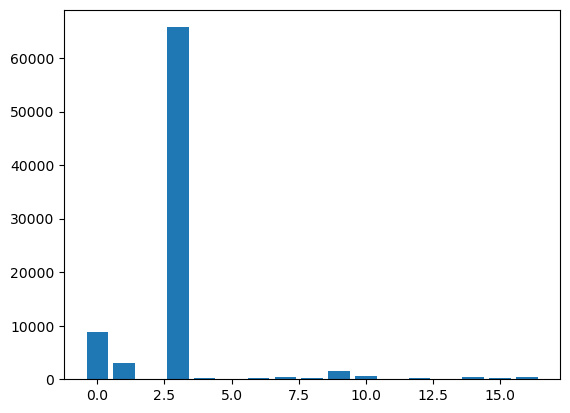

In [57]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [58]:
X_train.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_encode', 'family_history_with_overweight_encode', 'FAVC_encode',
       'CAEC_encode', 'Smoker_encode', 'SCC_encode', 'CALS_encode',
       'MTRANS_encode'],
      dtype='object')

In [59]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logr,n_features_to_select=5)
rfe.fit(X_resamples,y_sampled)

selected_features = rfe.support_

print("Selected features indices: ",selected_features)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected features indices:  [False False  True False  True False False False False  True  True False
 False False  True False False]


In [60]:
X_resamples.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_encode', 'family_history_with_overweight_encode', 'FAVC_encode',
       'CAEC_encode', 'Smoker_encode', 'SCC_encode', 'CALS_encode',
       'MTRANS_encode'],
      dtype='object')

##### Univariate feature selection
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif,k=5).fit_transform(X,y)
X_new.shape

(20758, 5)

In [62]:
X_new_selected = SelectKBest(f_classif,k=5)
X_new_selected.fit(X_resamples,y_sampled)
selected_features = X_new_selected.get_feature_names_out

In [63]:
selected_features()

array(['Age', 'Weight', 'FCVC', 'Gender_encode',
       'family_history_with_overweight_encode'], dtype=object)

##### Recursive feature elimination
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

##### L1-based feature selection
penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients

In [64]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(logr,prefit=True)
X_new = model.transform(X_resamples)
X_new.shape

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(12908, 8)

In [65]:
# Feature I want to use
# 'Age', 'Weight', 'FCVC', 'Gender_encode','family_history_with_overweight_encode'

In [66]:
X = dataset1[['Age', 'Weight', 'FCVC', 'Gender_encode','family_history_with_overweight_encode']]
y = dataset1['NObeyesdad']
logr_fs = LogisticRegression()
undersample = RandomUnderSampler(sampling_strategy='all')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [67]:
class_counts = Counter(y_train)
minority_classed = [cls for cls,count in class_counts.items() if count < 1500]
undersample_ratio = 1500
sample_to_keep = {cls:min(undersample_ratio,count) for cls,count in class_counts.items()}

undersampler = RandomUnderSampler(sampling_strategy=sample_to_keep,random_state=42)
X_resamples,y_sampled = undersample.fit_resample(X_train,y_train)

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X_resamples,y_sampled,random_state=0)
logr_fs = LogisticRegression()
logr_fs.fit(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_logr = cross_val_score(logr_fs,X_train,y_train,cv=5)
cross_val_logr

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.52658751, 0.51652893, 0.51652893, 0.51911157, 0.52892562])

In [70]:
logr_fs.fit(X_train,y_train)
logr_fs.score(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5164755707055056

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree_fs = DecisionTreeClassifier()
tree_fs.fit(X_train,y_train)
tree_fs.score(X_train,y_train)

0.9440140481355231

In [72]:
cross_val_tree = cross_val_score(tree_fs,X_train,y_train,cv=5)
cross_val_tree

array([0.78626742, 0.78512397, 0.79028926, 0.79390496, 0.7964876 ])

In [73]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_fs = KNeighborsClassifier()
kneighbors_fs.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
kneighbors_fs.score(X_train,y_train)

0.8459869848156182

In [75]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf_fs = RandomForestClassifier()
rf_fs.fit(X_train,y_train)
rf_fs.score(X_train,y_train)

0.9440140481355231

In [76]:
gb_fs = GradientBoostingClassifier()
gb_fs.fit(X_train,y_train)
gb_fs.score(X_train,y_train)

0.8536308232620597

In [77]:
cross_val_score_rf = cross_val_score(rf_fs,X_train,y_train,cv=5)
cross_val_score_gb = cross_val_score(gb_fs,X_train,y_train,cv=5)
cross_val_score_gb

array([0.82447083, 0.84142562, 0.83367769, 0.82644628, 0.82179752])

In [78]:
cross_val_score_rf

array([0.81362932, 0.80733471, 0.8052686 , 0.81766529, 0.80991736])

In [79]:
from sklearn.neural_network import MLPClassifier
mlp_fs = MLPClassifier(max_iter=3000)
mlp_fs.fit(X_train,y_train)
mlp_fs.score(X_train,y_train)

0.7459973143270323

In [80]:
cross_val_score_mlp = cross_val_score(mlp_fs,X_train,y_train,cv=5)
cross_val_score_mlp

array([0.75993805, 0.7536157 , 0.75154959, 0.74586777, 0.74328512])

### My algorithms
- Logistic Regression
- KneighborsClassification
- MLPClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- DecisionTreeClassifier

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pipe = Pipeline([('scaler',scaler),('log',logr_fs)])
param_grid = {
    'log__C':[1,2,3,4,5,6,7,8,9,10],
    'log__C':[0.1,0.01,0.001,0.0001,0.00001]
}
grid_search = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [114]:
grid_search.best_params_

{'log__C': 5}

In [115]:
grid_search.best_score_

0.7638678090575276

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pipe = Pipeline([('scaler',scaler),('tree',tree_fs)])
param_grid = {
    'tree__max_depth':[3,4,5,6,7,8,9,10],
    'tree__max_features':[1,2,3,4,5]
}
grid_search = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree', DecisionTreeClassifier())]),
             param_grid={'tree__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'tree__max_features': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [123]:
grid_search.best_params_

{'tree__max_depth': 8, 'tree__max_features': 5}

In [124]:
grid_search.best_score_

0.8057052343581251

In [126]:
scaler = StandardScaler()
pipe = Pipeline([('scaler',scaler),('knn',kneighbors_fs)])
param_grid = {
    'knn__n_neighbors':[3,4,5,6,7,8,9,10]
}
grid_search = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [127]:
grid_search.best_params_

{'knn__n_neighbors': 10}

In [128]:
grid_search.best_score_

0.7638644490844074

In [129]:
scaler = StandardScaler()
pipe = Pipeline([('scaler',scaler),('rf',rf_fs)])
param_grid = {
    'rf__n_estimators':[10,20,30,40,50],
    'rf__max_depth':[1,2,3,4,5],
    'rf__max_features':[4,5,6,7,8]
}
grid_search = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__max_features': [4, 5, 6, 7, 8],
                         'rf__n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [130]:
grid_search.best_params_

{'rf__max_depth': 5, 'rf__max_features': 4, 'rf__n_estimators': 30}

In [131]:
grid_search.best_score_

0.7908325533395731

In [135]:
scaler = StandardScaler()
pipe = Pipeline([('scaler',scaler),('gb',gb_fs)])
param_grid = {
    'gb__loss':['log_loss','exponential'],
    'gb__learning_rate':[1,2,3,4,5,6,7,8,9,10],
    'gb__max_features':[50,100,150]
}
grid_search = GridSearchCV(pipe,param_grid=param_grid,scoring='accuracy',cv=5)
grid_search.fit(X_test,y_test)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\reece\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\reece\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\reece\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 444, in fit
    self._check_params()
  File "C:\Users\reece\anaconda3\Lib\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gb__loss': ['log_loss', 'exponential'],
                         'gb__max_features': [50, 100, 150]},
             scoring='accuracy')

In [133]:
grid_search.best_params_

{'gb__criterion': 'friedman_mse',
 'gb__learning_rate': 1,
 'gb__loss': 'log_loss',
 'gb__max_features': 50}

In [134]:
grid_search.best_score_

0.5091765665874673